In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a practice set of random latitude and longitude combinations
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

# Add the latitutdes and longitudes to a list
coordinates = list(lat_lngs)

# Use the print()function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [6]:
# Import the dependencies
import pandas as pd
import matplotlib as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(low=-90.000,high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)

# Add the latitutdes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [9]:
# Import the requests library.
import requests
requests.__version__

'2.27.1'

In [10]:
# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=faf4aa2088023f8df3ece62d773008c5&q=Boston


In [13]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":77.27,"feels_like":78.78,"temp_min":72.18,"temp_max":80.98,"pressure":1017,"humidity":87},"visibility":10000,"wind":{"speed":9.22,"deg":180},"clouds":{"all":100},"dt":1658170634,"sys":{"type":2,"id":2009921,"country":"US","sunrise":1658136190,"sunset":1658189842},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [15]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 77.27,
  'feels_like': 78.78,
  'temp_min': 72.18,
  'temp_max': 80.98,
  'pressure': 1017,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 180},
 'clouds': {'all': 100},
 'dt': 1658170634,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1658136190,
  'sunset': 1658189842},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
print(city_url)

City weather not found.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=faf4aa2088023f8df3ece62d773008c5&q=Bston


In [17]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)

In [18]:
# Get the JSON data
boston_data = city_weather.json()
boston_data["sys"]

{'type': 2,
 'id': 2009921,
 'country': 'US',
 'sunrise': 1658136190,
 'sunset': 1658189842}

In [19]:
boston_data["coord"]["lat"]

42.3584

In [20]:
boston_data["main"]["temp_max"]

80.98

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 80.98 87 100 9.22


In [22]:
# Import the datetime module from the datetime library.
import time
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-18 18:58:11'

In [23]:
# Create an empty list to hold the weather data
city_data = []
# Print the begining of the logging
print("Beginning Data Retrieval ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i%50 ==0 and i >=50):
        set_count += 1
        record_count += 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the rocord count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval 
------------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | jablah
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | hay river
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | luanda
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | faya
Processing Record 22 of Set 1 | nishihara
Processing Record 23 of

Processing Record 186 of Set 4 | raudeberg
Processing Record 187 of Set 4 | nizwa
Processing Record 188 of Set 4 | port lincoln
Processing Record 189 of Set 4 | bilasipara
Processing Record 190 of Set 4 | maldonado
Processing Record 191 of Set 4 | asau
Processing Record 192 of Set 4 | manacapuru
Processing Record 193 of Set 4 | guerrero negro
Processing Record 194 of Set 4 | amalapuram
Processing Record 195 of Set 4 | lemesos
City not found. Skipping...
Processing Record 196 of Set 4 | korla
Processing Record 197 of Set 4 | narsaq
Processing Record 198 of Set 4 | wattegama
Processing Record 199 of Set 4 | ushtobe
Processing Record 200 of Set 4 | kavaratti
Processing Record 201 of Set 4 | brus laguna
Processing Record 202 of Set 4 | chokurdakh
Processing Record 203 of Set 4 | olafsvik
Processing Record 205 of Set 5 | hornepayne
Processing Record 206 of Set 5 | noshiro
Processing Record 207 of Set 5 | negele
City not found. Skipping...
Processing Record 208 of Set 5 | noumea
Processing R

Processing Record 375 of Set 8 | la seyne-sur-mer
Processing Record 376 of Set 8 | norman wells
Processing Record 377 of Set 8 | ransang
Processing Record 378 of Set 8 | tra vinh
Processing Record 379 of Set 8 | nosy varika
Processing Record 380 of Set 8 | najran
Processing Record 381 of Set 8 | redmond
Processing Record 382 of Set 8 | viedma
Processing Record 383 of Set 8 | mandera
Processing Record 384 of Set 8 | canutama
Processing Record 385 of Set 8 | caravelas
Processing Record 386 of Set 8 | bereda
Processing Record 387 of Set 8 | port hueneme
Processing Record 388 of Set 8 | kilmez
City not found. Skipping...
Processing Record 389 of Set 8 | srednekolymsk
Processing Record 390 of Set 8 | palotina
Processing Record 391 of Set 8 | espita
Processing Record 392 of Set 8 | sao filipe
Processing Record 393 of Set 8 | ouahigouya
Processing Record 394 of Set 8 | veraval
Processing Record 395 of Set 8 | gat
Processing Record 396 of Set 8 | qasigiannguit
Processing Record 397 of Set 8 | 

Processing Record 566 of Set 12 | maltahohe
Processing Record 567 of Set 12 | san lazaro
Processing Record 568 of Set 12 | takefu
Processing Record 569 of Set 12 | pilibanga
Processing Record 570 of Set 12 | khonuu
City not found. Skipping...
Processing Record 571 of Set 12 | troyes
Processing Record 572 of Set 12 | china
Processing Record 573 of Set 12 | gwadar
Processing Record 574 of Set 12 | kawalu
Processing Record 575 of Set 12 | port moresby
Processing Record 576 of Set 12 | villacarrillo
Processing Record 577 of Set 12 | barawe
City not found. Skipping...
Processing Record 578 of Set 12 | hohhot
Processing Record 579 of Set 12 | bunol
Processing Record 580 of Set 12 | samoded
Processing Record 581 of Set 12 | blackwater
Processing Record 582 of Set 12 | codrington
Processing Record 583 of Set 12 | luderitz
Processing Record 584 of Set 12 | ukhta
Processing Record 585 of Set 12 | karoi
Processing Record 586 of Set 12 | meulaboh
Processing Record 587 of Set 12 | cruzeiro do sul
P

In [24]:
len(city_data)

571

In [25]:
# Convert the array of dictionaries in a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,50.99,88,0,8.79,AU,2022-07-18 19:00:04
1,Adrar,20.5022,-10.0711,104.61,17,38,2.13,MR,2022-07-18 19:00:05
2,Puerto Ayora,-0.7393,-90.3518,75.16,89,93,4.00,EC,2022-07-18 18:56:03
3,Atuona,-9.8000,-139.0333,77.58,66,6,18.05,PF,2022-07-18 19:00:06
4,Pevek,69.7008,170.3133,32.65,81,100,4.00,RU,2022-07-18 19:00:06
5,Arraial Do Cabo,-22.9661,-42.0278,72.55,80,98,2.68,BR,2022-07-18 19:00:07
6,Port Alfred,-33.5906,26.8910,66.56,58,88,4.43,ZA,2022-07-18 19:00:07
7,Rikitea,-23.1203,-134.9692,74.35,78,36,12.80,PF,2022-07-18 19:00:08
8,Bredasdorp,-34.5322,20.0403,54.72,82,100,2.77,ZA,2022-07-18 19:00:09
9,Kodiak,57.7900,-152.4072,55.31,77,100,2.19,US,2022-07-18 19:00:10


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

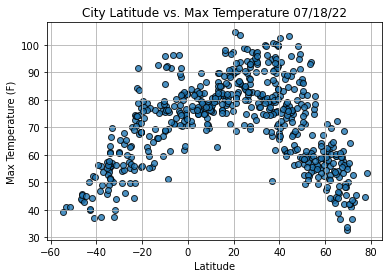

In [29]:
# Import the time module.
import time

# Import the dependencies
import matplotlib.pyplot as plt


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

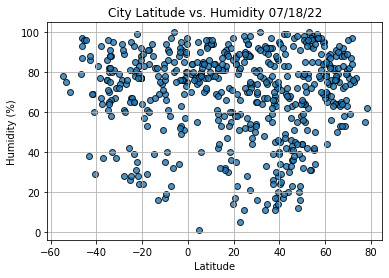

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

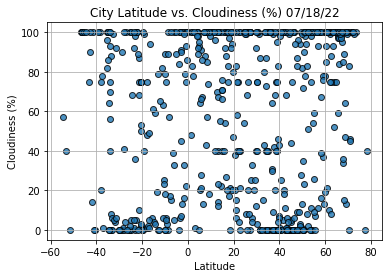

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

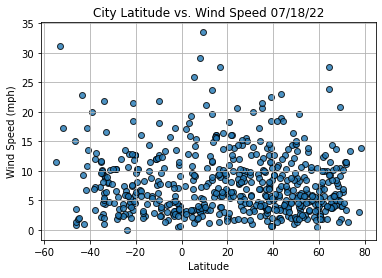

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()